In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import warnings
warnings.filterwarnings('ignore')

import klib

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\Downloads\archive (2)\Dry_Bean_Dataset.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [12]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


GridSpec(6, 6)

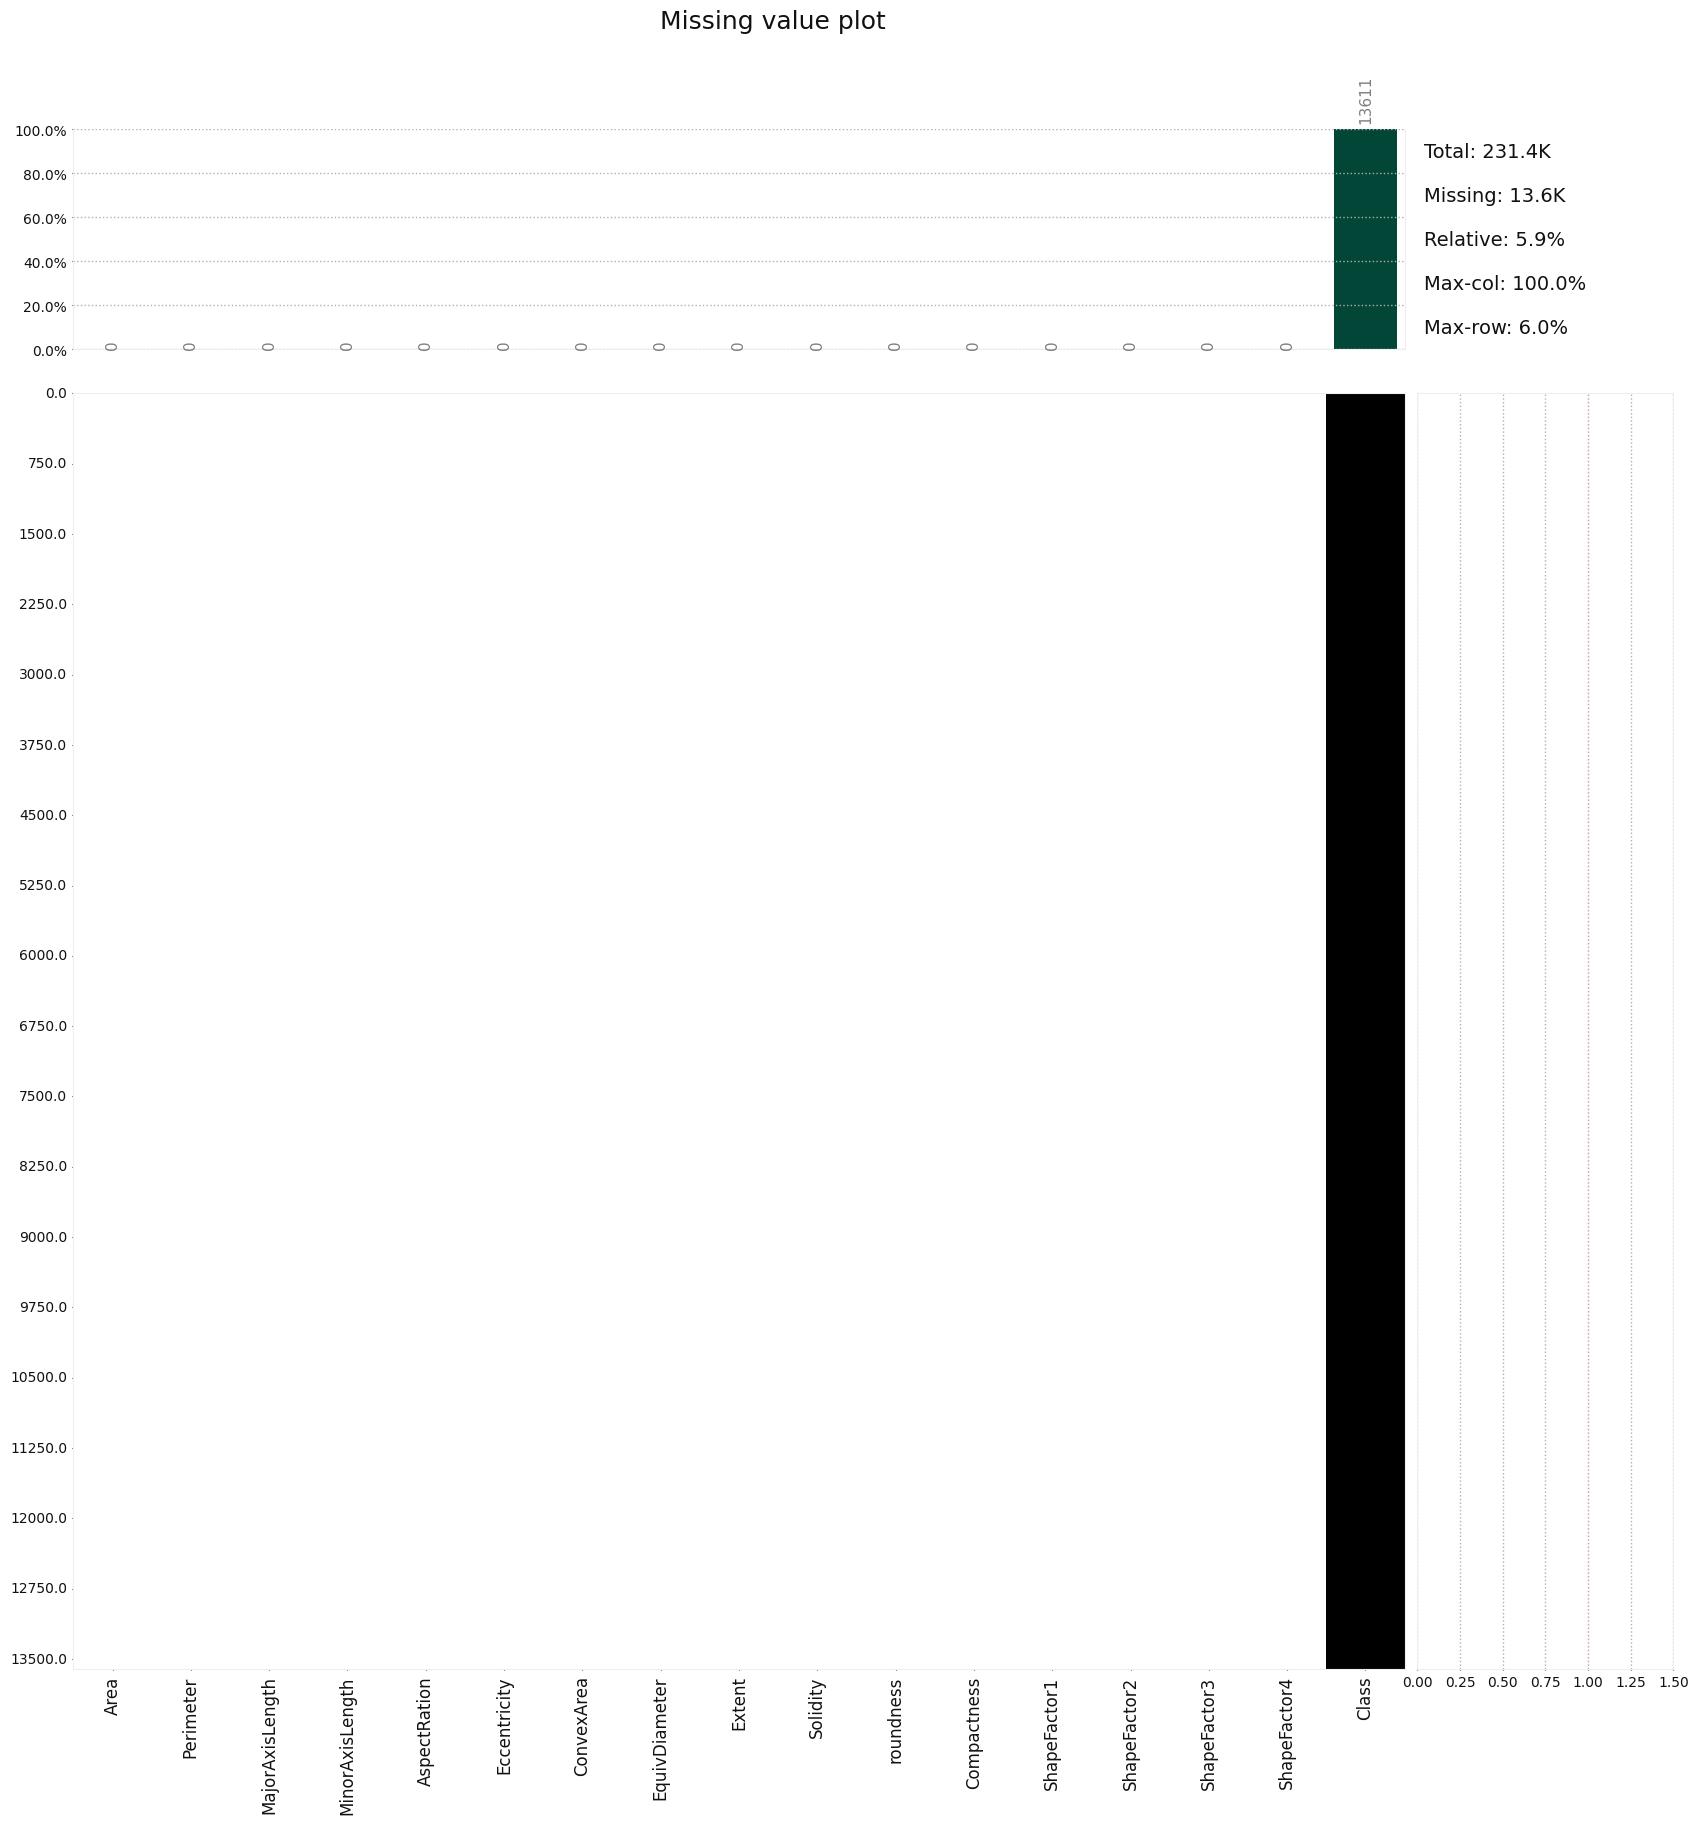

In [20]:
klib.missingval_plot(df)

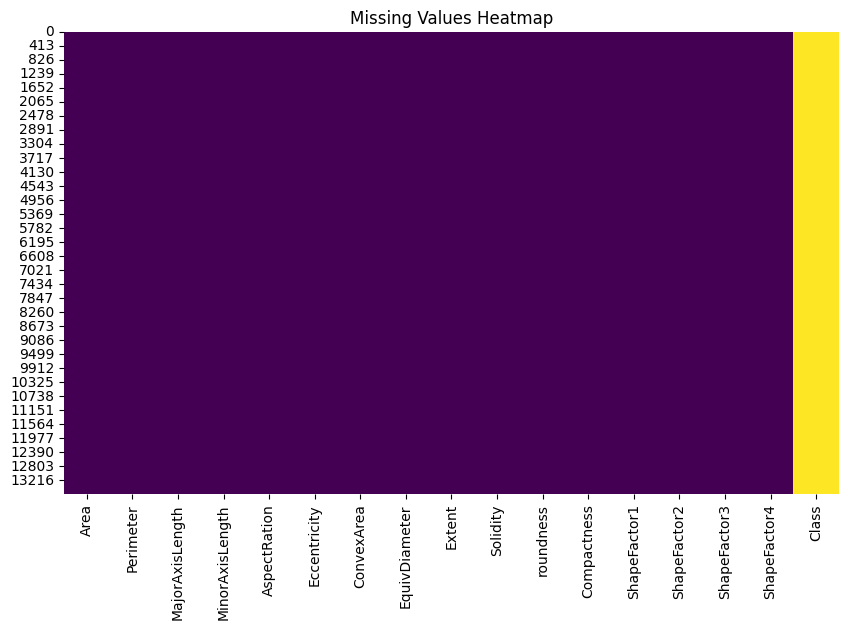

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
df.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64

In [15]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [3]:
df['Class'] = df['Class'].map({'DERMASON': 0, 'SIRA': 1, 'SEKER': 2, 'HOROZ': 3, 'CALI': 4, 'BARBUNYA': 5, 'BOMBAY': 6})

In [4]:
le = LabelEncoder()
cat_col = df.select_dtypes(include='object').columns
for col in cat_col:
  cardinality = df[col].nunique()
  if cardinality >= 5:
    df[col] = le.fit_transform(df[col])
  else:
    df = pd.get_dummies(df, columns=[col], dtype=int, drop_first=True)

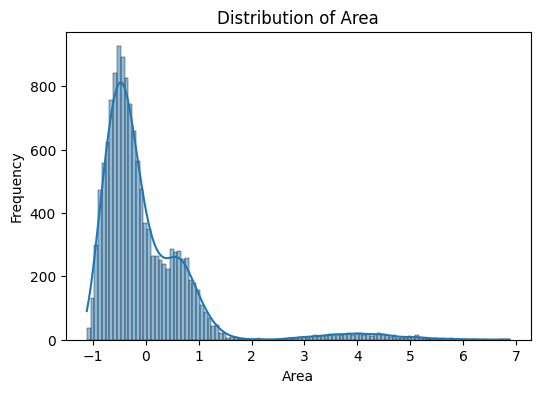

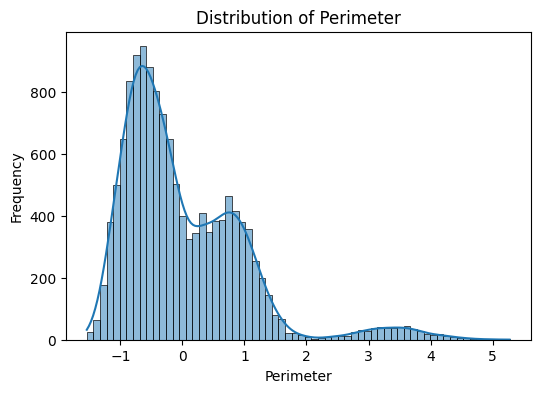

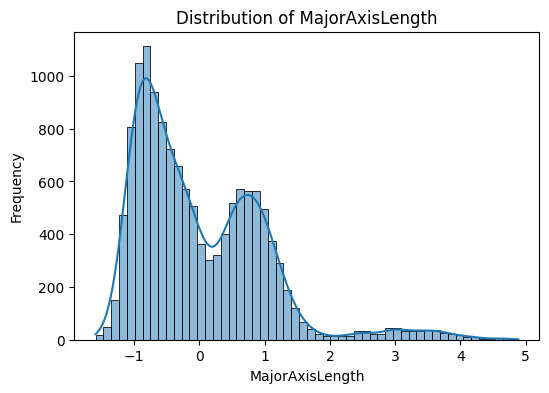

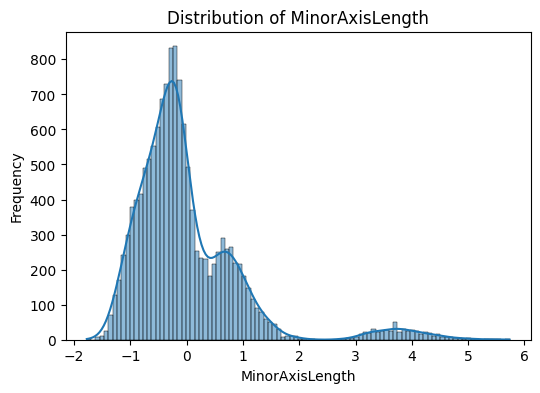

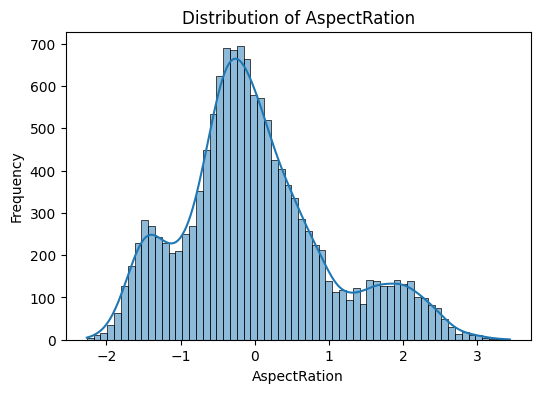

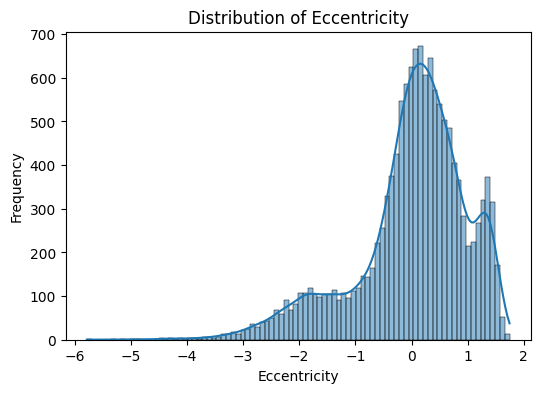

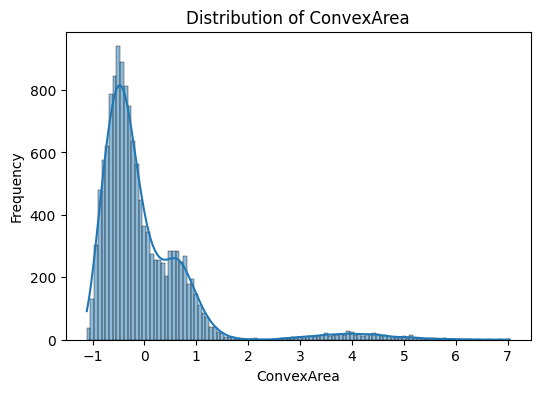

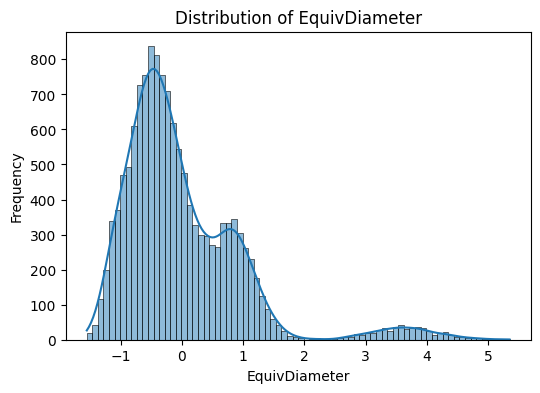

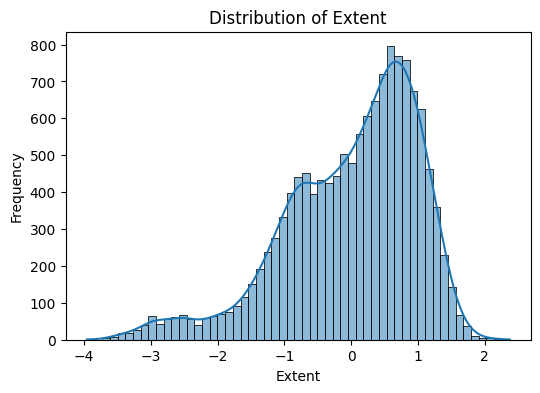

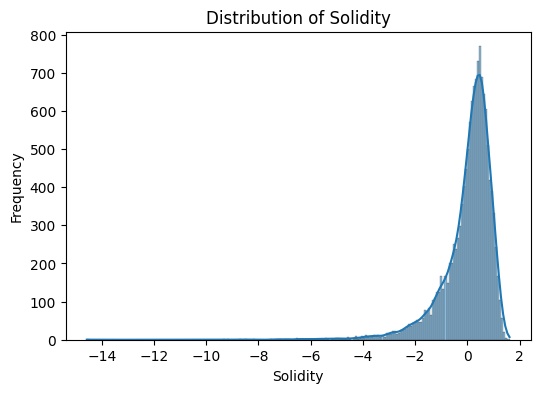

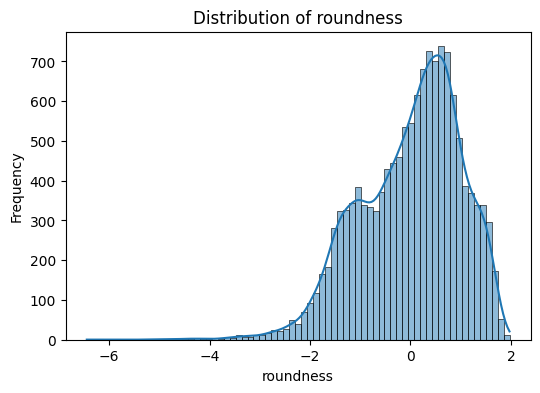

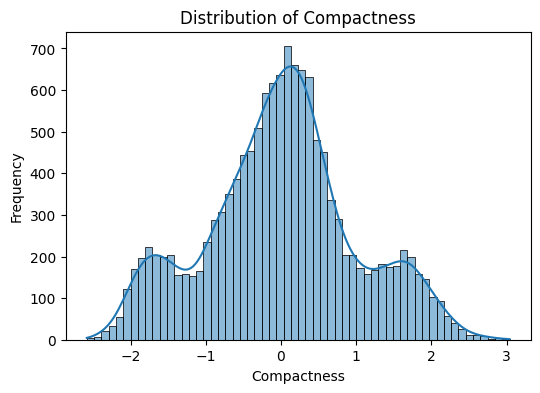

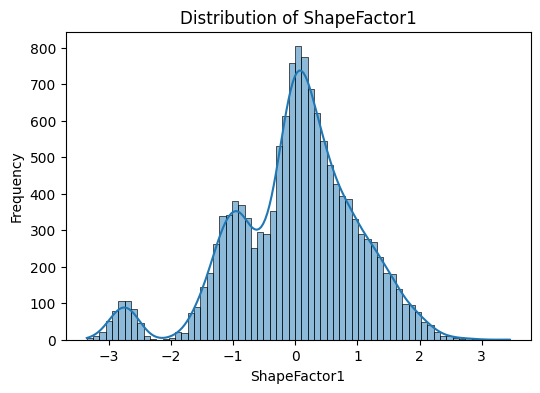

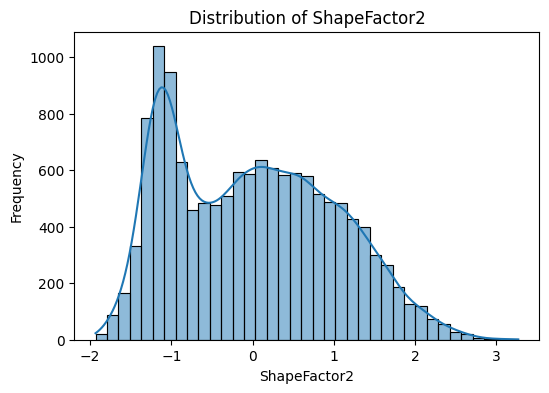

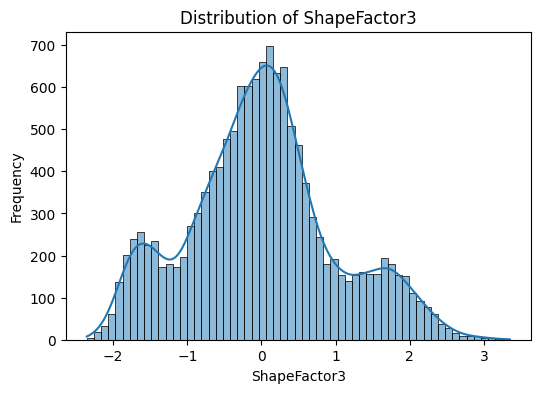

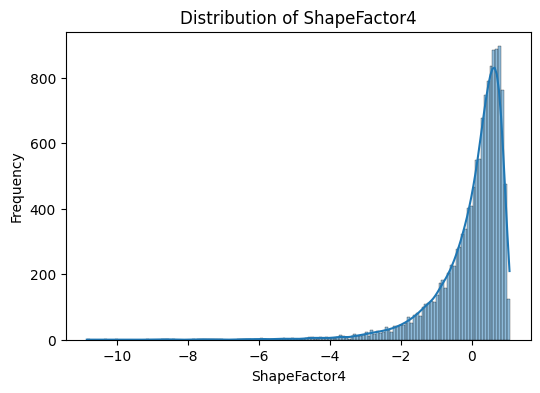

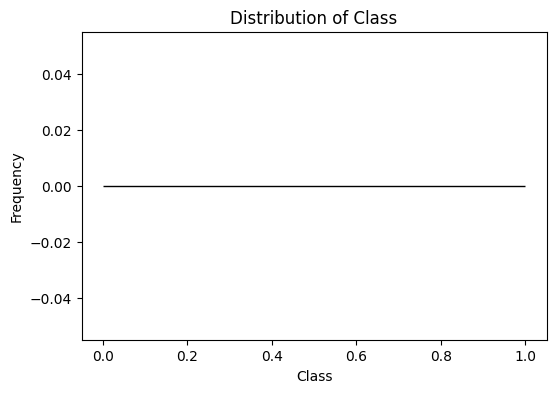

In [22]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
scaler = RobustScaler()
num_col = df.select_dtypes(include='number').columns
x = df.drop(columns=['Class'])
y = df['Class']

x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

df = pd.concat([x_scaled, y.reset_index(drop=True)], axis=1)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int64  
dtypes: float64(1

In [26]:
area_by_class = df.groupby('Class')['Area'].mean().reset_index()

fig = px.bar(area_by_class, 
  x='Class',
  y='Area', 
  title='Average Area by Class', 
  labels={'Class': 'Class Type', 'Area': 'Average Area'}, 
  color='Class')

fig.show()


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [16]:
model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

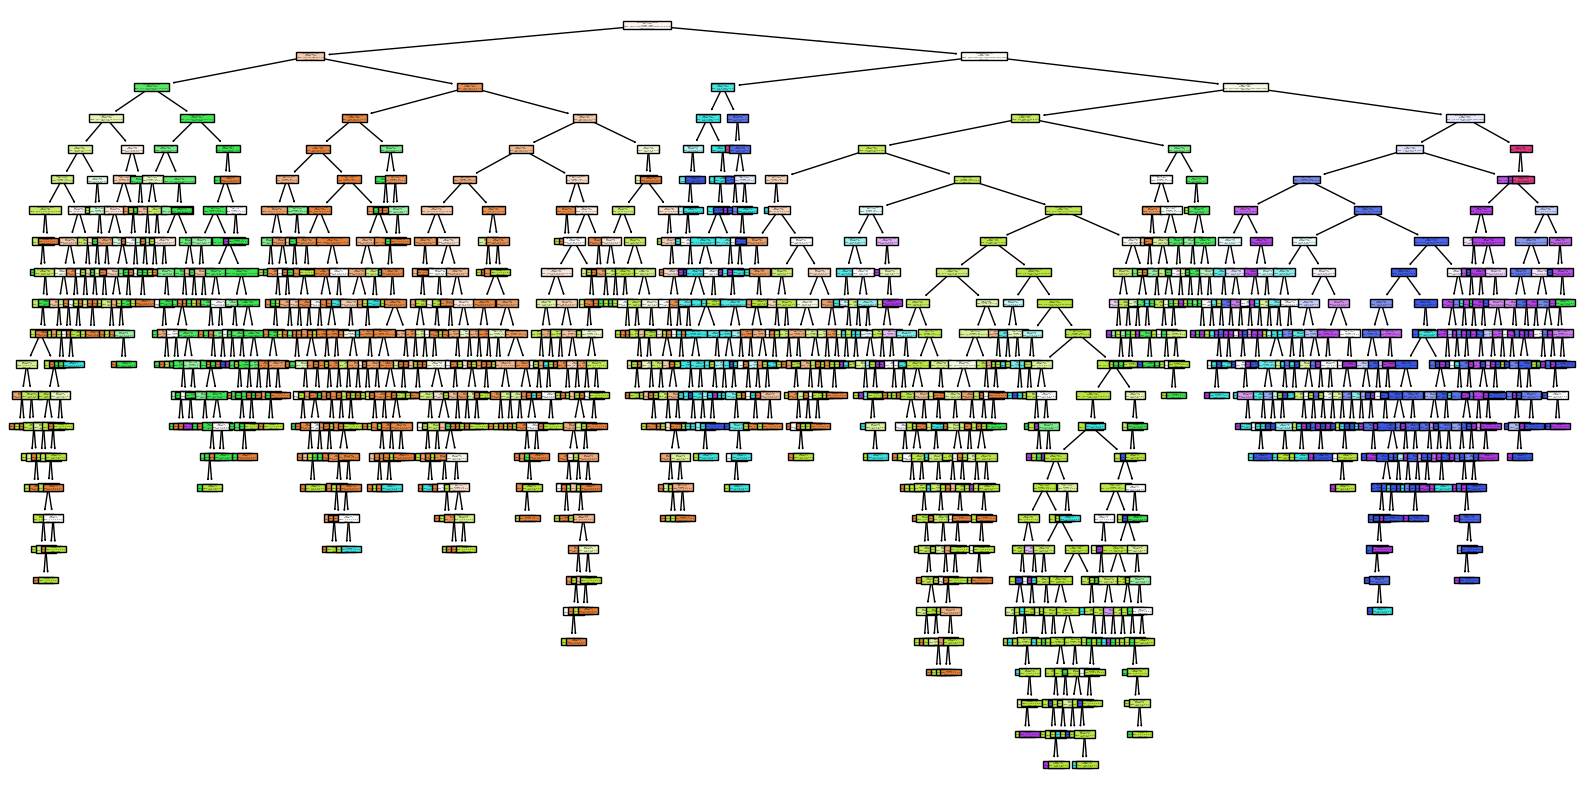

In [10]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=x.columns, class_names=['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY'], filled=True)
plt.show()

In [11]:
y_pred = model.predict(x_test)

In [19]:
rf_pred = rf_model.predict(x_test)

In [13]:
cv_report = classification_report(y_test, y_pred)
print(cv_report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       671
           1       0.82      0.84      0.83       536
           2       0.94      0.92      0.93       413
           3       0.94      0.92      0.93       408
           4       0.89      0.91      0.90       317
           5       0.87      0.88      0.87       261
           6       1.00      1.00      1.00       117

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



In [20]:
cv_rf_report = classification_report(y_test, rf_pred)
print(cv_report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       671
           1       0.82      0.84      0.83       536
           2       0.94      0.92      0.93       413
           3       0.94      0.92      0.93       408
           4       0.89      0.91      0.90       317
           5       0.87      0.88      0.87       261
           6       1.00      1.00      1.00       117

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



In [14]:
from tabulate import tabulate

In [22]:
headers = ['Model', 'F1-Score', 'Accuracy']
data = [['DecisionTreeClassifier', 0.88, 0.89],
        ['RandomForestClassifier', 0.88, 0.89]]

print(tabulate(data, headers=headers, tablefmt='grid'))

+------------------------+------------+------------+
| Model                  |   F1-Score |   Accuracy |
+========================+============+============+
| DecisionTreeClassifier |       0.88 |       0.89 |
+------------------------+------------+------------+
| RandomForestClassifier |       0.88 |       0.89 |
+------------------------+------------+------------+
